Ось **розгорнутий контент для файлу `07_projects.ipynb`**, який містить **реальні аналітичні задачі для закріплення знань** у сфері **інформаційно-аналітичного забезпечення військових штабів** з використанням Python.

---

# 📘 `07_projects.ipynb`

## **Тема: Приклади аналітичних завдань і мініпроєктів**

---

### 🔹 Вступ

У цьому файлі подано серію прикладних завдань і мініпроєктів, які дозволяють практично застосувати здобуті знання Python, Pandas, Matplotlib та файлових операцій у реальних умовах роботи військових аналітиків.

---

## 🔸 ✅ Проєкт 1: Аналіз оперативної обстановки на основі CSV

### 🔹 Вхідні дані:

`losses.csv` — файл зі щоденними втратами:

```csv
Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
...
```

### 🔹 Завдання:

1. Визначити сумарні втрати по кожному напрямку.
2. Побудувати графік динаміки втрат.
3. Виділити найнебезпечніші напрямки за останні 3 дні.
4. Експортувати аналіз у файл `summary.csv`.

---

## 🔸 ✅ Проєкт 2: Побудова ситуаційного графіка

### 🔹 Завдання:

1. Завантажити бойові донесення (`reports.txt`).
2. Витягти дати, напрямки, втрати за допомогою простого парсингу.
3. Побудувати графік змін бойової ситуації.
4. Вивести повідомлення, якщо втрати на одному напрямку перевищують 150 осіб.

---

## 🔸 ✅ Проєкт 3: Генерація аналітичної довідки

### 🔹 Вихід:

* Автоматичне створення `summary_report.txt` на основі обробленого CSV-файлу з висновками:

#### ▶️ Приклад:

```
✅ Напрямок з найвищими втратами: Схід (580 осіб)
✅ Найбільш залучений підрозділ: 1-а мехбр
✅ Динаміка втрат: зростання протягом 3 останніх днів
✅ Рекомендація: посилити угруповання на східному напрямку
```

---

## 🔸 ✅ Проєкт 4: Система фільтрації бойових подій

### 🔹 Вхідні дані:

* Список подій у форматі JSON або CSV
* Поля: дата, напрям, тип події, втрати, підрозділ

### 🔹 Завдання:

* Створити фільтр подій за напрямком та типом (наступ, артобстріл)
* Порахувати середні втрати по типу подій
* Побудувати порівняльний графік (artillery vs assault)

---

## 🔸 ✅ Проєкт 5 (просунутий): Комбінована панель звітності

1. Завантаження кількох звітів
2. Групування та обчислення статистик
3. Побудова декількох графіків
4. Генерація HTML-звіту або `.docx` через шаблон

---

## 📝 Загальні інструкції до проєктів:

* Рекомендується зберігати всі проєкти в окремих підпапках.
* Вхідні файли повинні бути збережені у форматі `.csv`, `.txt`, `.json`.
* Можна додати інтерфейс командного рядка для зручного запуску аналізу.
* Кожен проєкт має містити:

  * `README.md` (опис цілей)
  * `analyze.py` або `project.ipynb`
  * приклад вихідного звіту

---

### ✅ Порада

Для кожного проєкту бажано створювати структуру:

```
project_folder/
├── data/
├── output/
├── project.ipynb
└── README.md
```



--- Сумарні втрати по кожному напрямку ---
  Напрямок  Втрати
0  Південь     328
1   Північ     120
2     Схід     386




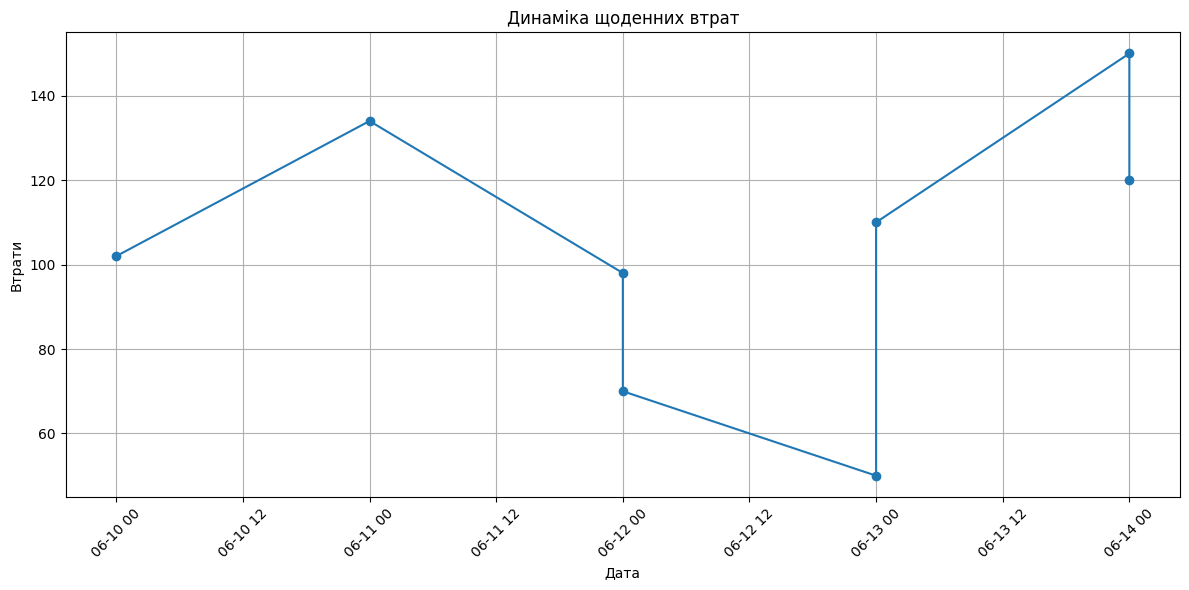

Графік динаміки втрат було побудовано.

--- Найнебезпечніші напрямки за останні 3 дні ---
  Напрямок  Втрати
0  Південь     328
2     Схід     150
1   Північ     120


Аналіз експортовано у файл 'summary.csv'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def analyze_losses(file_path="losses.csv"):
    """
    Analyzes daily losses from a CSV file, calculates total losses by direction,
    plots loss dynamics, identifies most dangerous directions, and exports
    a summary.

    Args:
        file_path (str): The path to the input CSV file.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
        return
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return

    # Ensure 'Дата' column is in datetime format
    df['Дата'] = pd.to_datetime(df['Дата'])
    df = df.sort_values(by='Дата')

    # 1. Визначити сумарні втрати по кожному напрямку.
    total_losses_by_direction = df.groupby('Напрямок')['Втрати'].sum().reset_index()
    print("--- Сумарні втрати по кожному напрямку ---")
    print(total_losses_by_direction)
    print("\n")

    # 2. Побудувати графік динаміки втрат.
    plt.figure(figsize=(12, 6))
    plt.plot(df['Дата'], df['Втрати'], marker='o', linestyle='-')
    plt.title('Динаміка щоденних втрат')
    plt.xlabel('Дата')
    plt.ylabel('Втрати')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("Графік динаміки втрат було побудовано.\n")

    # 3. Виділити найнебезпечніші напрямки за останні 3 дні.
    latest_date = df['Дата'].max()
    three_days_ago = latest_date - timedelta(days=2) # Inclusive of the latest day, so 3 days total
    recent_losses = df[df['Дата'] >= three_days_ago]

    if not recent_losses.empty:
        losses_last_3_days = recent_losses.groupby('Напрямок')['Втрати'].sum().reset_index()
        most_dangerous_directions = losses_last_3_days.sort_values(by='Втрати', ascending=False)
        print("--- Найнебезпечніші напрямки за останні 3 дні ---")
        print(most_dangerous_directions)
        print("\n")
    else:
        print("Недостатньо даних для визначення найнебезпечніших напрямків за останні 3 дні.\n")

    # 4. Експортувати аналіз у файл summary.csv.
    # Prepare data for summary.csv
    # Combine total losses by direction and most dangerous directions into a single dataframe
    # For simplicity, let's create a new DataFrame for the summary
    summary_data = {
        'Тип аналізу': ['Сумарні втрати по напрямку', 'Найнебезпечніші напрямки за останні 3 дні'],
        'Деталі': [total_losses_by_direction.to_string(index=False), most_dangerous_directions.to_string(index=False) if not most_dangerous_directions.empty else "Немає даних"]
    }
    summary_df = pd.DataFrame(summary_data)

    try:
        summary_df.to_csv("summary.csv", index=False, encoding='utf-8')
        print("Аналіз експортовано у файл 'summary.csv'.")
    except Exception as e:
        print(f"Помилка при експорті 'summary.csv': {e}")

# Example usage:
if __name__ == "__main__":
    # Create a dummy losses.csv file for testing
    dummy_data = {
        'Дата': ['2025-06-10', '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-14', '2025-06-12', '2025-06-13', '2025-06-14'],
        'Напрямок': ['Схід', 'Схід', 'Південь', 'Північ', 'Схід', 'Північ', 'Південь', 'Південь'],
        'Втрати': [102, 134, 98, 50, 150, 70, 110, 120],
        'Підрозділ': ['1-а мехбр', '1-а мехбр', '2-а танкбр', '3-я артбр', '1-а мехбр', '3-я артбр', '2-а танкбр', '2-а танкбр']
    }
    dummy_df = pd.DataFrame(dummy_data)
    dummy_df.to_csv("losses.csv", index=False)

    analyze_losses("losses.csv")